In [1]:
!git clone https://github.com/joeyxd/TradingStrategies.git

Cloning into 'TradingStrategies'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 95 (delta 0), reused 95 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 1.34 MiB | 8.06 MiB/s, done.


In [2]:
!pip install --user pandas numpy matplotlib backtrader mplfinance dask pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 44.6 MB/s eta 0:00:00:00:0100:01


In [3]:
import pandas as pd
import os

# --- 1. Configuration ---
# Set the base directory, which now points inside your cloned project folder.
base_directory = 'TradingStrategies/'
data_directory = os.path.join(base_directory, 'data/')

# The final output file will also be saved inside the project structure.
output_path = os.path.join(base_directory, 'data/NQ_Combined_Clean.parquet')

# --- 2. Data Loading and Consolidation ---
all_dataframes = []
print(f"Scanning for CSV files in '{data_directory}' and all its subfolders...")

# os.walk is perfect for nested folders. It will go through april, may, jun, etc.
for root, dirs, files in os.walk(data_directory):
    for filename in files:
        if filename.endswith('.csv'):
            file_path = os.path.join(root, filename)
            print(f"  -> Reading {file_path}")
            daily_df = pd.read_csv(file_path)
            all_dataframes.append(daily_df)

print(f"\nFound and read {len(all_dataframes)} daily CSV files.")
df = pd.concat(all_dataframes, ignore_index=True)
print("All files have been combined into a single dataset.")


# --- 3. Cleaning and Structuring ---
print("\nStarting data cleaning process...")

# The "Date" column from your grid export contains the full timestamp.
df['datetime'] = pd.to_datetime(df['Date'])
df.set_index('datetime', inplace=True)

# This is crucial: sort the entire dataset chronologically after combining.
df.sort_index(inplace=True)

# Standardize column names to lowercase.
df.columns = [col.lower() for col in df.columns]

# Select only the essential columns.
required_cols = ['open', 'high', 'low', 'close', 'volume']
final_df = df[required_cols]

print("Data cleaning complete.")

# --- 4. Final Verification and Saving ---
print("\nFinal DataFrame Information:")
final_df.info()

print("\nTop 5 rows of final data (first chronological entry):")
print(final_df.head())

# Save the final, cleaned DataFrame to a Parquet file.
final_df.to_parquet(output_path, engine='pyarrow')

print(f"\n✅ SUCCESS! Your consolidated and cleaned data has been saved to:\n{output_path}")

Scanning for CSV files in 'TradingStrategies/data/' and all its subfolders...
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-07-01 04-28 AM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-06 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-20 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-17 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-07-01 04-29 AM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-04 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-11 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-07-01 04-30 AM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-14 PM.csv
  -> Reading TradingStrategies/data/NQ abril 2025/NinjaTrader Grid 2025-06-30 04-22 PM.csv
  -> Reading

/tmp/ipykernel_331/2528712731.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'])


Data cleaning complete.

Final DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86483 entries, 2025-04-01 00:01:00 to 2025-07-01 08:16:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    86483 non-null  float64
 1   high    86483 non-null  float64
 2   low     86483 non-null  float64
 3   close   86483 non-null  float64
 4   volume  86483 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 MB

Top 5 rows of final data (first chronological entry):
                         open     high       low     close  volume
datetime                                                          
2025-04-01 00:01:00  19359.00  19373.5  19349.75  19364.50     389
2025-04-01 00:02:00  19364.00  19367.0  19356.00  19362.00     166
2025-04-01 00:03:00  19362.50  19363.5  19353.75  19356.00      92
2025-04-01 00:04:00  19357.25  19358.5  19349.75  19358.50     156
2025-04-01 00:05:00  19358.25  19361.

In [4]:
!git config --global user.name "joeyxd"

!git config --global user.email "xxajxx@gmail.com"

In [5]:
%cd TradingStrategies

/opt/notebooks/Training/AI/Introduction_to_PyTorch/TradingStrategies


In [6]:
!git add .

In [7]:
!git commit -m "Feat: Add consolidated NQ data and update script"

[main 1a97bec] Feat: Add consolidated NQ data and update script
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 data/NQ_Combined_Clean.parquet


In [11]:
import pandas as pd
import mplfinance as mpf

# Define the path to your clean, consolidated data file
data_path = 'TradingStrategies/data/NQ_Combined_Clean.parquet'

# Load the data from the Parquet file
# This will be extremely fast compared to reading CSVs
df = pd.read_parquet(data_path)

# Print the first and last few rows to confirm it loaded correctly
print("Data loaded successfully. Here's a sample:")
display(df.head())
display(df.tail())

# Use .info() to see the full date range and size of your dataset
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'TradingStrategies/data/NQ_Combined_Clean.parquet'

In [12]:
import pandas as pd
import mplfinance as mpf

# Define the path to your clean, consolidated data file
data_path = 'Training/AI/Introduction_to_PyTorch/TradingStrategies/data/NQ_Combined_Clean.parquet'

# Load the data from the Parquet file
# This will be extremely fast compared to reading CSVs
df = pd.read_parquet(data_path)

# Print the first and last few rows to confirm it loaded correctly
print("Data loaded successfully. Here's a sample:")
display(df.head())
display(df.tail())

# Use .info() to see the full date range and size of your dataset
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Training/AI/Introduction_to_PyTorch/TradingStrategies/data/NQ_Combined_Clean.parquet'

In [13]:
pwd

'/opt/notebooks/Training/AI/Introduction_to_PyTorch/TradingStrategies'

In [14]:
!ls -R

.:
consolidate_data.ipynb	data  README.md

./data:
'NQ abril 2025'		    'NQ July 2025'  'NQ may 2025'
 NQ_Combined_Clean.parquet  'NQ june 2025'

'./data/NQ abril 2025':
'NinjaTrader Grid 2025-06-30 04-01 PM.csv'
'NinjaTrader Grid 2025-06-30 04-02 PM.csv'
'NinjaTrader Grid 2025-06-30 04-03 PM.csv'
'NinjaTrader Grid 2025-06-30 04-04 PM.csv'
'NinjaTrader Grid 2025-06-30 04-06 PM.csv'
'NinjaTrader Grid 2025-06-30 04-07 PM.csv'
'NinjaTrader Grid 2025-06-30 04-08 PM.csv'
'NinjaTrader Grid 2025-06-30 04-09 PM.csv'
'NinjaTrader Grid 2025-06-30 04-10 PM.csv'
'NinjaTrader Grid 2025-06-30 04-11 PM.csv'
'NinjaTrader Grid 2025-06-30 04-13 PM.csv'
'NinjaTrader Grid 2025-06-30 04-14 PM.csv'
'NinjaTrader Grid 2025-06-30 04-15 PM.csv'
'NinjaTrader Grid 2025-06-30 04-16 PM.csv'
'NinjaTrader Grid 2025-06-30 04-17 PM.csv'
'NinjaTrader Grid 2025-06-30 04-20 PM.csv'
'NinjaTrader Grid 2025-06-30 04-21 PM.csv'
'NinjaTrader Grid 2025-06-30 04-22 PM.csv'
'NinjaTrader Grid 2025-07-01 04-23 AM.csv'
'NinjaTrader 

In [15]:
import pandas as pd
import mplfinance as mpf

# The corrected path, starting from your current folder.
data_path = 'data/NQ_Combined_Clean.parquet'

# Load the data from the Parquet file
df = pd.read_parquet(data_path)

# Print the first and last few rows to confirm it loaded correctly
print("✅ Data loaded successfully. Here's a sample:")
display(df.head())
display(df.tail())

# Use .info() to see the full date range and size of your dataset
df.info()

✅ Data loaded successfully. Here's a sample:


,open,high,low,close,volume
datetime,,,,,
2025-04-01 00:01:00,19359.00,19373.5,19349.75,19364.50,389
2025-04-01 00:02:00,19364.00,19367.0,19356.00,19362.00,166
2025-04-01 00:03:00,19362.50,19363.5,19353.75,19356.00,92
2025-04-01 00:04:00,19357.25,19358.5,19349.75,19358.50,156
2025-04-01 00:05:00,19358.25,19361.5,19357.00,19359.75,95


,open,high,low,close,volume
datetime,,,,,
2025-07-01 08:12:00,22790.75,22799.50,22788.25,22795.50,836
2025-07-01 08:13:00,22795.75,22812.75,22795.75,22810.50,1156
2025-07-01 08:14:00,22810.75,22829.50,22808.00,22828.75,1530
2025-07-01 08:15:00,22828.50,22830.75,22823.00,22829.50,1282
2025-07-01 08:16:00,22829.00,22848.25,22825.00,22833.25,1617


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86483 entries, 2025-04-01 00:01:00 to 2025-07-01 08:16:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    86483 non-null  float64
 1   high    86483 non-null  float64
 2   low     86483 non-null  float64
 3   close   86483 non-null  float64
 4   volume  86483 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 MB


In [16]:
# Define the rules for how to aggregate the 1-minute bars into 4-hour bars
ohlc_rules = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}

# Apply the resampling rules to the DataFrame
df_4h = df.resample('4H').apply(ohlc_rules)

# Drop any empty rows that result from non-trading periods
df_4h.dropna(inplace=True)

print("✅ Data successfully resampled to 4-hour bars. Here's a sample:")
display(df_4h.head())

✅ Data successfully resampled to 4-hour bars. Here's a sample:


/tmp/ipykernel_331/2372901332.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_4h = df.resample('4H').apply(ohlc_rules)


,open,high,low,close,volume
datetime,,,,,
2025-04-01 00:00:00,19359.00,19511.0,19349.75,19491.75,39889
2025-04-01 04:00:00,19491.25,19493.5,19311.25,19420.25,143578
2025-04-01 08:00:00,19419.75,19644.0,19261.25,19511.25,372350
2025-04-01 12:00:00,19510.50,19629.0,19385.00,19598.00,184356
2025-04-01 16:00:00,19600.50,19697.0,19556.75,19594.00,25972


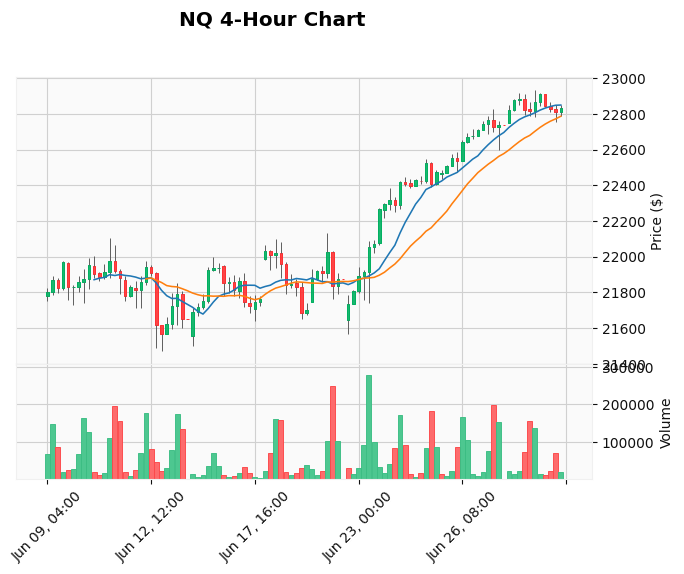

In [17]:
import mplfinance as mpf

# --- This is the same code as before, just using '4h' as recommended ---
ohlc_rules = {
    'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'
}
df_4h = df.resample('4h').apply(ohlc_rules)
df_4h.dropna(inplace=True)
# ---

# Now, create the plot using mplfinance
mpf.plot(
    df_4h.tail(100),           # The data to plot
    type='candle',             # The type of plot
    style='yahoo',             # The visual style
    title='NQ 4-Hour Chart',   # The chart title
    ylabel='Price ($)',        # Y-axis label
    volume=True,               # Show the volume subplot
    mav=(10, 20)               # Add 10-period and 20-period moving averages
)